# <strong> Task <strong>

Predict personal medical insurance costs.

# <strong> Table of Contents <strong>


1.   <a href="#library">Library</a>
1.   <a href="#importdata">Import Data</a>
1.   <a href="#eda">EDA (Exploratary Data Analysis)</a>

    *   <a href="#summary">Summary</a>
    *   <a href="#missing">Missing Values</a>
    *   <a href="#visualization">Visualization</a>
        *   <a href="#v1">Function for Histogram Plot</a>
        *   <a href="#v2">Function for Histogram and Distribution</a>
        *   <a href="#v3">Statistical Distribution of "bmi"</a>
        *   <a href="#v4">Function for Box Plot</a>
        *   <a href="#v5">Analysis of "smoker" and "charges"</a>
        *   <a href="#v6">Analysis of "smoker" and "region"</a>
        *   <a href="#v7">Function for Count Plot</a>
        *   <a href="#v8">Analysis of "bmi" and "sex"</a>
        *   <a href="#v9">Analysis of "region" and "children"</a>
        *   <a href="#v10">Analysis of "age" and "bmi"</a>
        *   <a href="#v11">Analysis of "bmi" and "children"</a>
        *   <a href="#v12">Outliers Detection for "bmi"</a>
        *   <a href="#v13">Analysis of "bmi" and "charges"</a>
        *   <a href="#v14">Analysis of "region", "smoker" and "bmi"</a>
        *   <a href="#v15">Bonus</a>
    *   <a href="#correlation">Correlation Matrix</a>
1.   <a href="#ml">Machine Learning Model</a>
    *   <a href="#encoding">Label Encoding</a>
    *   <a href="#split">Train-Test Split</a>
    *   <a href="#normalization">Normalization</a>
    *   <a href="#regression">Regression Models</a>
    *   <a href="#cv">Cross Validation</a>
    *   <a href="#grid">Grid Search and Hyper Parameters Optimization</a>
    *   <a href="#evaluation">Evaluation</a>











---



---



# <strong> Inference and Insight <strong>


1.   <a href="#in1">In-1: Features</a>
1.   <a href="#in2">In-2: Feature Distribution</a>
1.   <a href="#in3">In-3: Missing Values</a>
1.   <a href="#in4">In-4: Distribution of "bmi"</a>
1.   <a href="#in5">In-5:  "smoker" and "charges"</a>
1.   <a href="#in6">In-6:  New Rules for "smoker" and "charges"</a>
1.   <a href="#in7">In-7:  "region" and "children" </a>
1.   <a href="#in8">In-8:  "age" and "bmi" - 1 </a>
1.   <a href="#in9">In-9:  "age" and "bmi" - 2 </a>
1.   <a href="#in10">In-10:  "bmi" and "children" </a>
1.   <a href="#in11">In-11:  Outlier Detection for "bmi" </a>
1.   <a href="#in12">In-12:  "bmi" and "charges" </a>
1.   <a href="#in13">In-13:  Correlation Matrix </a>

# <strong> Function <strong>


1.   <a href="#func1">Histogram Plot</a>
1.   <a href="#func2">Histogram and Distribution</a>
1.   <a href="#func3">Box Plot</a>
1.   <a href="#func4">Count Plot</a>

<a name="library"></a>
# <strong> Library <strong>

In [ ]:
#operation
import numpy as np
import pandas as pd

#import data
from google.colab import files
import io

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#machine learning model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV



---



---



<a name="importdata"></a>
# <strong> Import Data <strong>

In [ ]:
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['insurance.csv']))
data_copy = data.copy()

Saving insurance.csv to insurance (6).csv




---



---



<a name="eda"></a>
# <strong>EDA (Exploratary Data Analysis)<strong>









<a name="summary"></a>
### **Summary**

In [ ]:
#features
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<a name="in1"></a>
**In-1:**

**Features:** age, sex, bmi, children, smoker, region, charges

In [ ]:
#summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<a name="in2"></a>
**In-2:**

**Feature Distrubition**

*   **Numerical:** age, bmi, children, charges
*   **Categorical:** sex, smoker, region



In [ ]:
#top five data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#last five data
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


<a name="missing"></a>
### **Missing Values**

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<a name="in3"></a>
**In-3:**

There is no missing values.

<a name="visualization"></a>
### **Visualization**

<a name="func1"></a>
<a name="v1"></a>
##### Function for Histogram Plot

In [ ]:
#histogram plot function
def histogram_plot(df,feature):
  #set plot size
  plt.figure(figsize=(7,2))

  #draw plot
  plt.hist(df[feature])

  #set plot labels
  y_label='frequency'
  plt.xlabel(feature)
  plt.ylabel(y_label)

  #show plot
  plt.show()

<a name="func2"></a>
<a name="v2"></a>
##### Function for Histogram and Distribution

In [ ]:
#histogram and distribution function
def hist_and_dist(df,feature):
  sns.distplot(df[feature])
  plt.show()

<a name="v3"></a>
##### Statistical Distribution of **"bmi"**

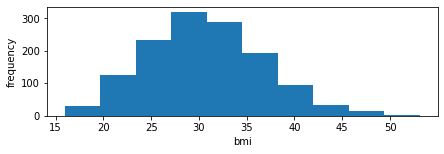

In [ ]:
#histogram
feature = 'bmi'
histogram_plot(data,feature)

In [ ]:
#healthy and anothers for bmi
data['bmi_health']=['healthy' if i>=18.5 and i<=24.9 else 'non-healthy' for i in data.bmi]
data['bmi_detail']=['under' if i<=18.5 else 'healthy' if i<=24.5 else 'over' if i<=29.9 else 'obese' for i in data.bmi]

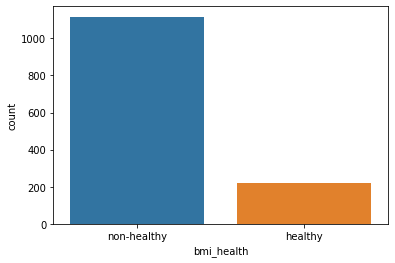

In [ ]:
sns.countplot(x='bmi_health',data=data)
plt.show()

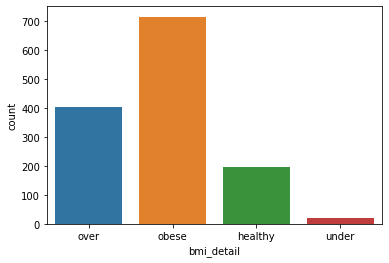

In [ ]:
sns.countplot(x='bmi_detail',data=data)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



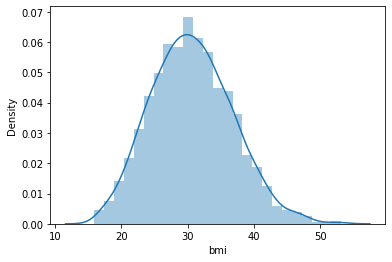

In [ ]:
#histogram and distribution
hist_and_dist(data,feature)

<a name="in4"></a>
**In-4:**

Feature of "bmi" fits a normal distribution and has a symmetric structure. Moreover, the value of "30 bmi" is the most.

<a name="func3"></a>
<a name="v4"></a>
##### Function for Box Plot

In [ ]:
#box plot function
def box_plot(df,X,y):
  sns.boxplot(data=df,x=X,y=y)
  plt.show()


<a name="v5"></a>
##### Analysis of "**smoker**" and "**charges**"

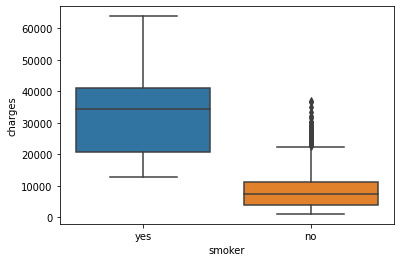

In [ ]:
box_plot(data,'smoker','charges')

<a name="in5"></a>
**In-5:**

Feature of person who does not smoke has outliers. Moreover, there is no smoker under 10000 dollars, and is smoker more than approximately 40000 dollars with 100% probability. Thus, we can infere a new rule by grouping that. First of all, we should be detect minimum and maximum values on "charges". Therefore, it can be help **describe()** function to us.



In [ ]:
#conditions for smoker
smoker_no = data.smoker == 'no'
smoker_yes =  data.smoker == 'yes'

In [ ]:
data[smoker_yes].describe()

,age,bmi,children,charges
count,274.000000,274.000000,274.000000,274.000000
mean,38.514599,30.708449,1.113139,32050.231832
std,13.923186,6.318644,1.157066,11541.547176
min,18.000000,17.195000,0.000000,12829.455100
25%,27.000000,26.083750,0.000000,20826.244213
50%,38.000000,30.447500,1.000000,34456.348450
75%,49.000000,35.200000,2.000000,41019.207275
max,64.000000,52.580000,5.000000,63770.428010


smoker-yes-max: **63770.428010**
smoker-yes-min: **12829.455100**


In [ ]:
data[smoker_no].describe()

,age,bmi,children,charges
count,1064.000000,1064.000000,1064.000000,1064.000000
mean,39.385338,30.651795,1.090226,8434.268298
std,14.083410,6.043111,1.218136,5993.781819
min,18.000000,15.960000,0.000000,1121.873900
25%,26.750000,26.315000,0.000000,3986.438700
50%,40.000000,30.352500,1.000000,7345.405300
75%,52.000000,34.430000,2.000000,11362.887050
max,64.000000,53.130000,5.000000,36910.608030


smoker-no-max: **36910.608030**
smoker-no-min: **1121.873900**


<a name="in6"></a>
**In-6:**

**New Rules:**


*   If smoker == 'yes' => charge_group = 0
*   If smoker == 'no' => charge_group = 1

In [ ]:
data["smoker_rule"]=[1 if i=='yes' else 0 for i in data.smoker]

<a name="v6"></a>
##### Analysis of "**smoker**" and "**region**"

In [ ]:
data.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<a name="func4"></a>
<a name="v7"></a>
##### Function for Count Plot

In [ ]:
def count_plot(x,hue,df,order=False,rotation=False):
  if order:
    sns.countplot(x=x,
                  hue=hue,
                  data=df,
                  order = data[x].value_counts().index)
  elif rotation:
    sns.countplot(y=x,
                  hue=hue,
                  data=df)
  else:
    sns.countplot(x=x,
                  hue=hue,
                  data=df)
  plt.show()

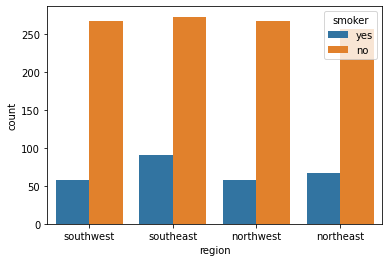

In [ ]:
count_plot('region','smoker',data)

In [ ]:
#north vs. south
data['north_south']=['north' if i == 'northwest' or i =='northeast' else 'south' for i in data.region]

In [ ]:
#east vs. west
data['east_west']=['east' if i == 'northeast' or i =='southeast' else 'west' for i in data.region]

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_health,bmi_detail,smoker_rule,north_south,east_west
0,19,female,27.900,0,yes,southwest,16884.92400,non-healthy,over,1,south,west
1,18,male,33.770,1,no,southeast,1725.55230,non-healthy,obese,0,south,east
2,28,male,33.000,3,no,southeast,4449.46200,non-healthy,obese,0,south,east
3,33,male,22.705,0,no,northwest,21984.47061,healthy,healthy,0,north,west
4,32,male,28.880,0,no,northwest,3866.85520,non-healthy,over,0,north,west


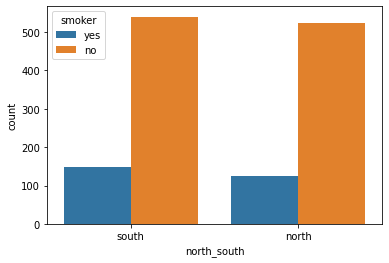

In [ ]:
count_plot('north_south','smoker',data)

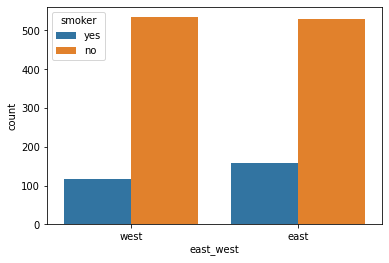

In [ ]:
count_plot('east_west','smoker',data)

<a name="v8"></a>
##### Analysis of "**bmi**" and "**sex**"

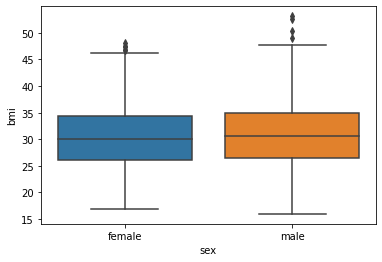

In [ ]:
box_plot(data,'sex','bmi')

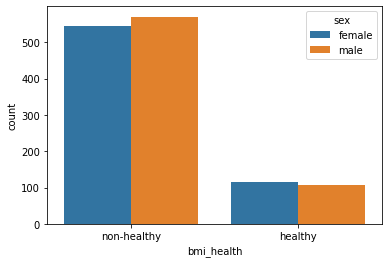

In [ ]:
count_plot('bmi_health','sex',data)

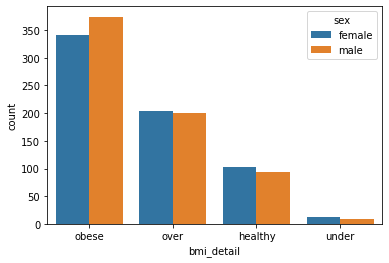

In [ ]:
count_plot('bmi_detail','sex',data,order=True)

<a name="v9"></a>
##### Analysis of "**region**" and "**children**"

In [ ]:
#the most children
data.groupby(['region'])['children'].sum()

region
northeast    339
northwest    373
southeast    382
southwest    371
Name: children, dtype: int64

<a name="in7"></a>
**In-7:**

Region of **Southeast** has the most children.

<a name="v10"></a>
##### Analysis of "**age**" and "**bmi**"

In [ ]:
min_age = data.age.min()
max_age = data.age.max()

print(f"Minimum age: {min_age} - Maximum age: {max_age}")

Minimum age: 18 - Maximum age: 64


In [ ]:
"""
18-25: 'youth'
26-45: 'middle'
45-64: 'old'
"""
data['age_generation']=['youth' if i<26 else 'middle' if i<46 else 'old' for i in data.age]

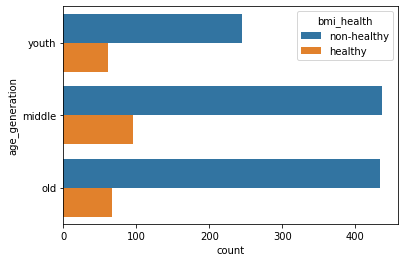

In [ ]:
count_plot('age_generation','bmi_health',data,rotation=True)

<a name="in8"></a>
**In-8:**

The count of **"old"** and **"middle"** are more than youths by **bmi_health**. Others have balance.

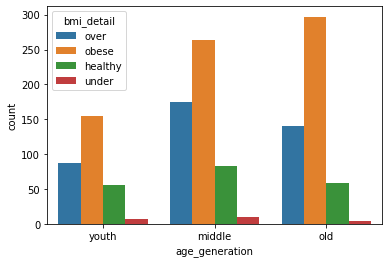

In [ ]:
count_plot('age_generation','bmi_detail',data)

<a name="in9"></a>
**In-9:**

While the count of **"old"** and **"middle"** are more than youths by **over** and **obese**, others have balance.

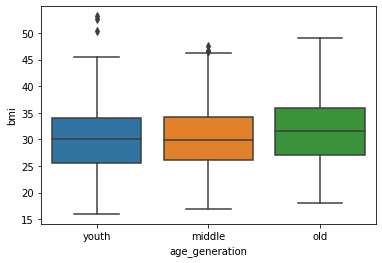

In [ ]:
box_plot(data,'age_generation','bmi')

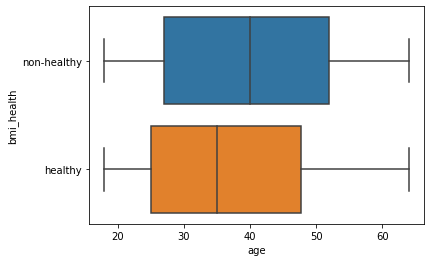

In [ ]:
box_plot(data,'age','bmi_health')

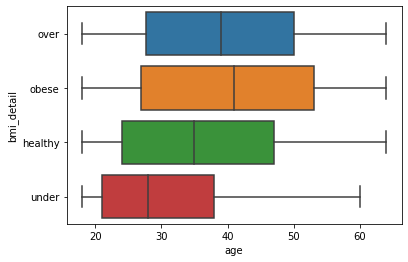

In [ ]:
box_plot(data,'age','bmi_detail')

<a name="v11"></a>
#### Analysis of "**bmi**" and "**children**"`

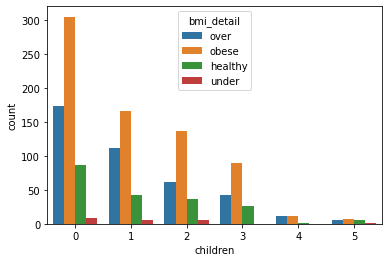

In [ ]:
count_plot('children','bmi_detail',data)

<a name="in10"></a>
**In-10:**

*   The count of obese people who have no children is about two times more than people who have children.
*   Anybody who has three or more children has not underweight.




<a name="v12"></a>
#### Outliers Detection for "bmi"

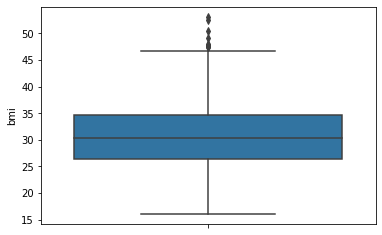

In [ ]:
sns.boxplot(data=data,y='bmi')
plt.show()

<a name="in11"></a>
**In-11:**

**"bmi"** has outliers greater than upper bound.





<a name="v13"></a>
#### Analysis of "**bmi**" and "**charges**"`

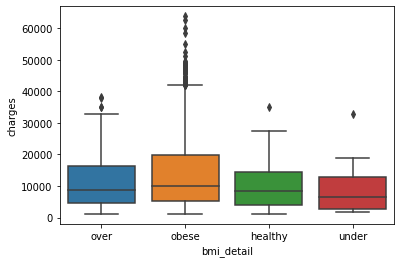

In [ ]:
box_plot(data,'bmi_detail','charges')

<a name="in12"></a>
**In-12:**

People with obese and overweight has more than $30000 charges with %100 probability.

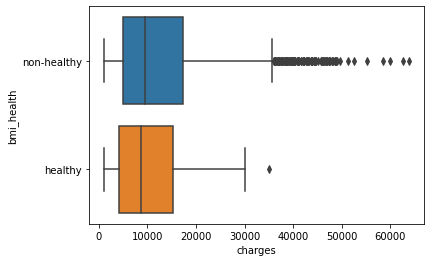

In [ ]:
box_plot(data,'charges','bmi_health')

<a name="v14"></a>
#### Analysis of "**region**", "**smoker**" and "**bmi**"



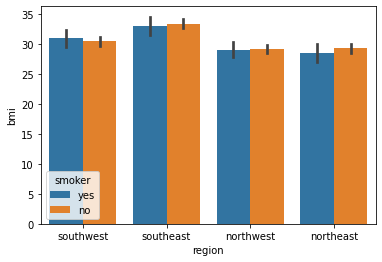

In [ ]:
sns.barplot(x="region", y="bmi", hue="smoker", data=data)
plt.show()

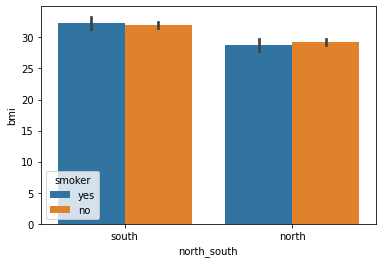

In [ ]:
sns.barplot(x="north_south", y="bmi", hue="smoker", data=data)
plt.show()

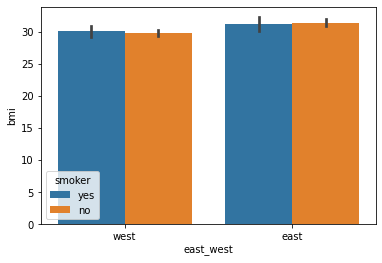

In [ ]:
sns.barplot(x="east_west", y="bmi", hue="smoker", data=data)
plt.show()

<a name="v15"></a>
#### **Bonus**

##### **Pair Plot**

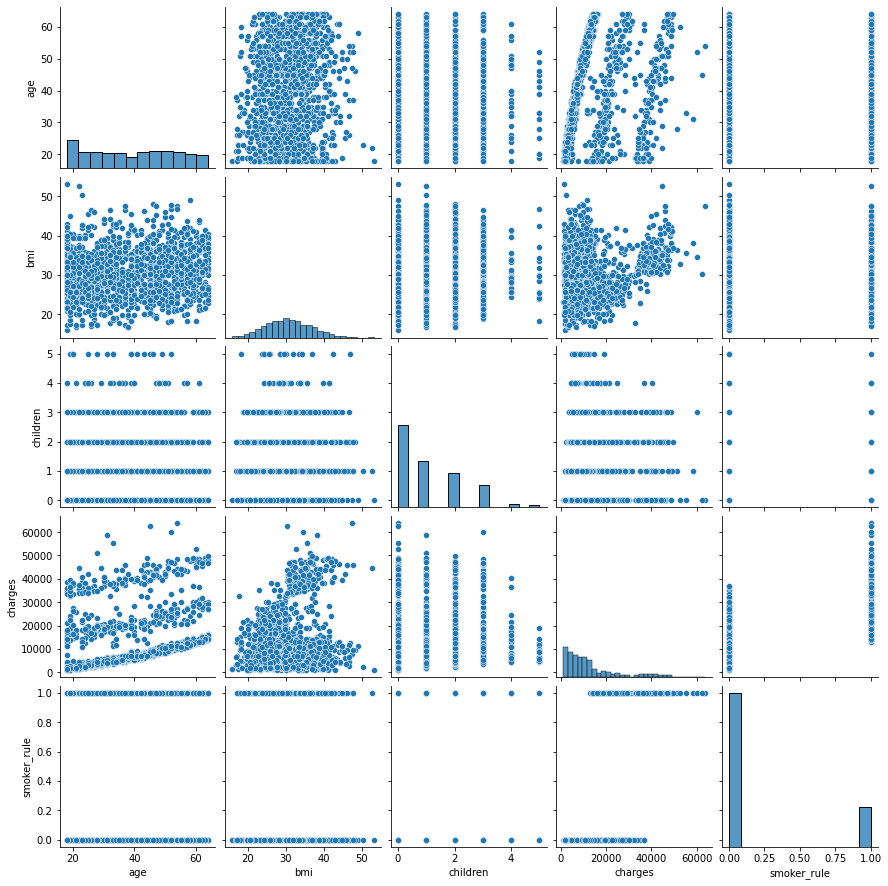

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_health,bmi_detail,smoker_rule,north_south,east_west,age_generation
0,19,female,27.900,0,yes,southwest,16884.92400,non-healthy,over,1,south,west,youth
1,18,male,33.770,1,no,southeast,1725.55230,non-healthy,obese,0,south,east,youth
2,28,male,33.000,3,no,southeast,4449.46200,non-healthy,obese,0,south,east,middle
3,33,male,22.705,0,no,northwest,21984.47061,healthy,healthy,0,north,west,middle
4,32,male,28.880,0,no,northwest,3866.85520,non-healthy,over,0,north,west,middle


##### **Violin Plot for "children" and "charges"**

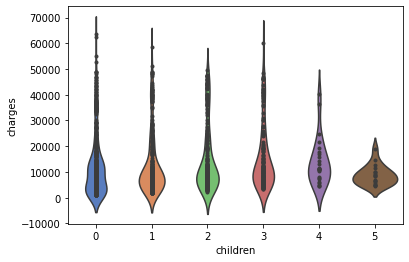

In [ ]:
sns.violinplot(data=data,x='children',y='charges',palette='muted',inner='points')
plt.show()

##### **Histogram for "charges"**

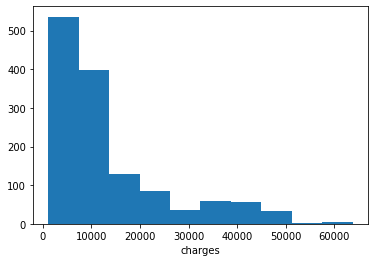

In [ ]:
plt.hist(data.charges)
plt.xlabel('charges')
plt.show()

##### **Pie Plot for "sex"**

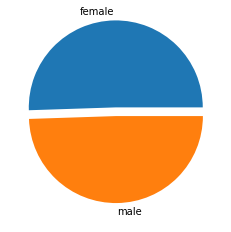

In [ ]:
values = data.sex.value_counts()
labels = data.sex.unique().tolist()
explode = (0.1, 0)

plt.pie(values, labels=labels, explode=explode)
plt.show()

##### **Donut Pie Plot for "age" and "bmi"**

In [ ]:
values=data.age_generation.value_counts()
labels=data.age_generation.unique().tolist()
fig = go.Figure(data=[go.Pie(values=values, labels=labels)])
fig.show()

In [ ]:
values=data.bmi_detail.value_counts()
labels=data.bmi_detail.unique().tolist()
fig = go.Figure(data=[go.Pie(values=values, labels=labels)])
fig.show()

##### **Donut Pie Plot for "region"**

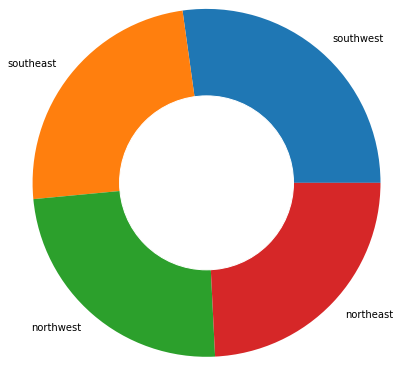

In [ ]:
values = data.region.value_counts()
labels = data.region.unique().tolist()

plt.pie(values,labels=labels,radius=2)

circle=plt.Circle((0,0),1,color='white')
plot = plt.gcf()

plot.gca().add_artist(circle)
plt.show()

<a name="correlation"></a>
### **Correlation Matrix**

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_health,bmi_detail,smoker_rule,north_south,east_west,age_generation
0,19,female,27.900,0,yes,southwest,16884.92400,non-healthy,over,1,south,west,youth
1,18,male,33.770,1,no,southeast,1725.55230,non-healthy,obese,0,south,east,youth
2,28,male,33.000,3,no,southeast,4449.46200,non-healthy,obese,0,south,east,middle
3,33,male,22.705,0,no,northwest,21984.47061,healthy,healthy,0,north,west,middle
4,32,male,28.880,0,no,northwest,3866.85520,non-healthy,over,0,north,west,middle


In [ ]:
#from categorical to numerical for correlation matrix
data_corr = data.copy()

data_corr['smoker_numeric']=[1 if i=='yes' else 0 for i in data.smoker]
data_corr['region_numeric']=[0 if i=='southwest' else 1 if i =='southeast' else 2 if i=='northwest' else 3 for i in data.region]
data_corr['gender']=[0 if i=='female' else 1 for i in data.sex]
data_corr['age_numeric']=[0 if i=='youth' else 1 if i=='middle' else 2 for i in data.age_generation]
data_corr['bmi_numeric']=[0 if i=='obese' else 1 if i=='over' else 2 if i=='healthy' else 3 for i in data.bmi_detail]

In [ ]:
data_corr.head()

,age,sex,bmi,children,smoker,region,charges,bmi_health,bmi_detail,smoker_rule,north_south,east_west,age_generation,smoker_numeric,region_numeric,gender,age_numeric,bmi_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,non-healthy,over,1,south,west,youth,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,non-healthy,obese,0,south,east,youth,0,1,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,non-healthy,obese,0,south,east,middle,0,1,1,1,0
3,33,male,22.705,0,no,northwest,21984.47061,healthy,healthy,0,north,west,middle,0,2,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,non-healthy,over,0,north,west,middle,0,2,1,1,1


In [ ]:
columns = ['age','age_numeric','bmi','bmi_numeric','smoker_numeric','children','charges','region_numeric','gender']

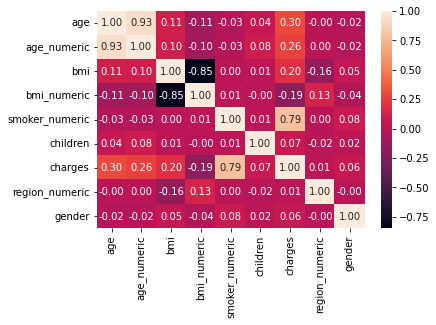

In [ ]:
sns.heatmap(data_corr[columns].corr(),annot=True,fmt='.2f')
plt.show()

<a name="in13"></a>
**In-13:**

There is **negative correlation** between smoker and charges.

<a name="ml"></a>
# <strong>Machine Learning Model<strong>

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges,bmi_health,bmi_detail,smoker_rule,north_south,east_west,age_generation
0,19,female,27.900,0,yes,southwest,16884.92400,non-healthy,over,1,south,west,youth
1,18,male,33.770,1,no,southeast,1725.55230,non-healthy,obese,0,south,east,youth
2,28,male,33.000,3,no,southeast,4449.46200,non-healthy,obese,0,south,east,middle
3,33,male,22.705,0,no,northwest,21984.47061,healthy,healthy,0,north,west,middle
4,32,male,28.880,0,no,northwest,3866.85520,non-healthy,over,0,north,west,middle


In [ ]:
data_corr.head()

,age,sex,bmi,children,smoker,region,charges,bmi_health,bmi_detail,smoker_rule,north_south,east_west,age_generation,smoker_numeric,region_numeric,gender,age_numeric,bmi_numeric
0,19,female,27.900,0,yes,southwest,16884.92400,non-healthy,over,1,south,west,youth,1,0,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,non-healthy,obese,0,south,east,youth,0,1,1,0,0
2,28,male,33.000,3,no,southeast,4449.46200,non-healthy,obese,0,south,east,middle,0,1,1,1,0
3,33,male,22.705,0,no,northwest,21984.47061,healthy,healthy,0,north,west,middle,0,2,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,non-healthy,over,0,north,west,middle,0,2,1,1,1


<a name="encoding"></a>
###**Label Encoding**

In [ ]:
data_copy.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#one-hot encoding
encoder_columns= ['sex','smoker','region','bmi_health','bmi_detail','north_south','east_west','age_generation']

encoded=pd.get_dummies(data=data,columns=encoder_columns)
encoded.head()

,age,bmi,children,charges,smoker_rule,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,...,bmi_detail_obese,bmi_detail_over,bmi_detail_under,north_south_north,north_south_south,east_west_east,east_west_west,age_generation_middle,age_generation_old,age_generation_youth
0,19,27.900,0,16884.92400,1,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
1,18,33.770,1,1725.55230,0,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,28,33.000,3,4449.46200,0,0,1,1,0,0,...,1,0,0,0,1,1,0,1,0,0
3,33,22.705,0,21984.47061,0,0,1,1,0,0,...,0,0,0,1,0,0,1,1,0,0
4,32,28.880,0,3866.85520,0,0,1,1,0,0,...,0,1,0,1,0,0,1,1,0,0


<a name="split"></a>
###**Train-Test Split**

In [ ]:
encoded.head()

,age,bmi,children,charges,smoker_rule,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,...,bmi_detail_obese,bmi_detail_over,bmi_detail_under,north_south_north,north_south_south,east_west_east,east_west_west,age_generation_middle,age_generation_old,age_generation_youth
0,19,27.900,0,16884.92400,1,1,0,0,1,0,...,0,1,0,0,1,0,1,0,0,1
1,18,33.770,1,1725.55230,0,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,28,33.000,3,4449.46200,0,0,1,1,0,0,...,1,0,0,0,1,1,0,1,0,0
3,33,22.705,0,21984.47061,0,0,1,1,0,0,...,0,0,0,1,0,0,1,1,0,0
4,32,28.880,0,3866.85520,0,0,1,1,0,0,...,0,1,0,1,0,0,1,1,0,0


In [ ]:
X = encoded.drop(['charges'],axis=1)
y= encoded.charges

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

<a name="normalization"></a>
###**Normalization**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y_train = y_train.to_frame()
y_test = y_test.to_frame()

for i in [X_train, X_test, y_train, y_test]:
  scaler.fit_transform(i)


<a name="regression"></a>
###**Regression Models**

In [ ]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

linear_regression = LinearRegression()

#xgboost 
xgb_regression  = XGBRegressor(max_depth=4,
                               n_estimators=80,
                               learning_rate =.2,
                               objective = "reg:squarederror")

#random forest
rf_regression = RandomForestRegressor(max_depth = 4, n_estimators=500)

regressors = [
    ('Linear Regression', linear_regression),
    ('XGB Regression', xgb_regression),
    ('Random Forest Regression', rf_regression)
]

<a name="cross"></a>
###**Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
r2_scores = []

for regressor_name, model in regressors:
  scores = cross_val_score(model, X_train, y_train.values.ravel(), cv=3, scoring="r2")
  r2_scores.append(scores.mean()*100)

  print("{} r2 Score:".format(regressor_name),str(round(sum(scores)/3*100,3))+"%\n")

Linear Regression r2 Score: 74.144%

XGB Regression r2 Score: 82.561%

Random Forest Regression r2 Score: 85.17%



<a name="grid"></a>
###**Grid Search and Hyper Parameters Optimization**

In [ ]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

parameters = {
              'criterion':['squared_error','absolute_error','poisson'],
              'max_depth':[2,3,4],
              #'min_samples_split':[2,3],
              #'min_samples_leaf':[1,2,3],
              'max_features':['sqrt','log2',None],
              'bootstrap':[False,True],
              #'ccp_alpha':[0.0,0.2,0.4]
              
              }


rf_grid = GridSearchCV(rf,
                        parameters,
                        cv = 3,
                        n_jobs = -1
                        )

rf_grid.fit(X_train, y_train.values.ravel())

print(f'Best Score: {rf_grid.best_score_}')
print(f'Best Params: {rf_grid.best_params_}')

Best Score: 0.8520332956260702
Best Params: {'bootstrap': True, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': None}


<a name="evaluation"></a>
###**Evaluation**

In [ ]:
optimize_rf= RandomForestRegressor(bootstrap= True, criterion= 'squared_error', max_depth= 4, max_features= None)

rmse = cross_val_score(optimize_rf, X_train, y_train.values.ravel() ,cv=3, scoring = "neg_mean_squared_error")
print(f'Mean Squared Error of Random Forest Regressor: {rmse, 3}')

rmae = cross_val_score(optimize_rf, X_train, y_train.values.ravel() ,cv=3, scoring = "neg_mean_absolute_error")
print(f'Mean Absolute Error of Random Forest Regressor: {rmae, 3}')

r2 = cross_val_score(optimize_rf, X_train, y_train.values.ravel() ,cv=3, scoring = "r2").mean() # Generally used to determine how good is the model. 
print(f'r2 Score of Random Forest Regressor: %{round(r2*100,4)}')

Mean Squared Error of Random Forest Regressor: (array([-18065103.22889176, -22488931.78116295, -22990212.36576558]), 3)
Mean Absolute Error of Random Forest Regressor: (array([-2546.82890275, -2546.36506668, -2729.35429342]), 3)
r2 Score of Random Forest Regressor: %85.144
